In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-data/Test.csv
/kaggle/input/ecommerce-data/Train.csv
/kaggle/input/ecommerce-data/Sample_Submission.xlsx


In [2]:
train = pd.read_csv('/kaggle/input/ecommerce-data/Train.csv')
test = pd.read_csv('/kaggle/input/ecommerce-data/Test.csv')
sub = pd.read_excel('/kaggle/input/ecommerce-data/Sample_Submission.xlsx')

In [3]:
train.shape, test.shape, sub.shape

((2452, 8), (1051, 7), (1051, 1))

In [4]:
train.head(5)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [5]:
train.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

In [6]:
train.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

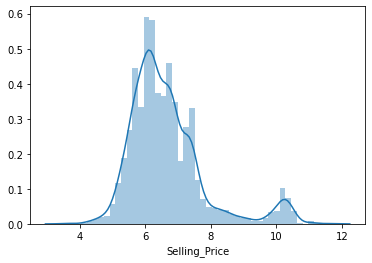

In [7]:
sns.distplot(np.log1p(train['Selling_Price']));

In [8]:
#train = train[train['Selling_Price'] > 50]
train = train[train['Selling_Price'] < 100000]

In [9]:
df = train.append(test,ignore_index=True)
df.shape

(3502, 8)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
#df['Dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
#df['DayOfyear'] = pd.to_datetime(df['Date']).dt.dayofyear
#df['WeekOfyear'] = pd.to_datetime(df['Date']).dt.weekofyear
df['Is_month_start'] =  df['Date'].dt.is_month_start 
df['Is_month_end'] = df['Date'].dt.is_month_end 
df['Is_quarter_start'] = df['Date'].dt.is_quarter_start
df['Is_quarter_end'] = df['Date'].dt.is_quarter_end 
df['Is_year_start'] = df['Date'].dt.is_year_start 
df['Is_year_end'] = df['Date'].dt.is_year_end

In [11]:
df.head(3)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Day,Month,Year,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,3,2,2017,False,False,False,False,False,False
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,1,7,2015,True,False,True,False,False,False
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,12,1,2019,False,False,False,False,False,False


In [12]:
calc = df.groupby(['Product_Brand'], axis=0).agg({'Product_Brand':[('op1', 'count')]}).reset_index() 
calc.columns = ['Product_Brand','Product_Brand Count']
df = df.merge(calc, on=['Product_Brand'], how='left')

calc = df.groupby(['Item_Category'], axis=0).agg({'Item_Category':[('op1', 'count')]}).reset_index() 
calc.columns = ['Item_Category','Item_Category Count']
df = df.merge(calc, on=['Item_Category'], how='left')

calc = df.groupby(['Subcategory_1'], axis=0).agg({'Subcategory_1':[('op1', 'count')]}).reset_index() 
calc.columns = ['Subcategory_1','Subcategory_1 Count']
df = df.merge(calc, on=['Subcategory_1'], how='left')

calc = df.groupby(['Subcategory_2'], axis=0).agg({'Subcategory_2':[('op1', 'count')]}).reset_index() 
calc.columns = ['Subcategory_2','Subcategory_2 Count']
df = df.merge(calc, on=['Subcategory_2'], how='left')

In [13]:
agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby('Product_Brand').agg(agg_func)
agg_func.columns = [ 'Product_Brand_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Product_Brand'], how='left')

agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby('Item_Category').agg(agg_func)
agg_func.columns = [ 'Item_Category_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Item_Category'], how='left')

agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby('Subcategory_1').agg(agg_func)
agg_func.columns = [ 'Subcategory_1_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Subcategory_1'], how='left')

agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby('Subcategory_2').agg(agg_func)
agg_func.columns = [ 'Subcategory_2_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Subcategory_2'], how='left')

In [14]:
#df['Diff'] = (pd.to_datetime("today") - df['Date']) / np.timedelta64(1,'D')

In [15]:
agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby(['Product_Brand', 'Item_Category']).agg(agg_func)
agg_func.columns = [ 'Product_Brand_Item_Category_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Product_Brand', 'Item_Category'], how='left')

agg_func = {
    'Item_Rating': ['mean','median','min','max','sum']    
}
agg_func = df.groupby(['Item_Category', 'Subcategory_2']).agg(agg_func)
agg_func.columns = [ 'Item_Category_Subcategory_2_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['Item_Category', 'Subcategory_2'], how='left')

In [16]:
#for c in ['Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2']:
#    df[c] = df[c].astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Product_Brand'] = le.fit_transform(df['Product_Brand'])

df = pd.get_dummies(df, columns=['Item_Category', 'Subcategory_1', 'Subcategory_2'], drop_first=True)

In [17]:
df.drop(['Product','Date'], axis=1, inplace=True)

In [18]:
train_df = df[df['Selling_Price'].isnull()!=True]
test_df = df[df['Selling_Price'].isnull()==True]
test_df.drop(['Selling_Price'], axis=1, inplace=True)

In [19]:
train_df['Selling_Price'] = np.log1p(train_df['Selling_Price'])

In [20]:
X = train_df.drop(labels=['Selling_Price'], axis=1)
y = train_df['Selling_Price'].values

X.shape, y.shape

((2451, 674), (2451,))

In [21]:
X.head(3)

,Product_Brand,Item_Rating,Day,Month,Year,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,...,Subcategory_2_water fountains,Subcategory_2_wedges,Subcategory_2_western wear,Subcategory_2_winter seasonal wear,Subcategory_2_wishkey action figures,Subcategory_2_wrist bands,Subcategory_2_x plus action figures,Subcategory_2_yellow chimes butterfly fairy alloy,Subcategory_2_you2deal showpieces,Subcategory_2_zoop wrist watches
0,1129,4.3,3,2,2017,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,876,3.1,1,7,2015,True,False,True,False,False,...,0,0,1,0,0,0,0,0,0,0
2,369,3.5,12,1,2019,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from math import sqrt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [23]:
Xtest = test_df

In [28]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

errrf = []
y_pred_totrf = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestRegressor(random_state=42, n_estimators=200)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    print("RMSLE: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))

    errrf.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))
    p = rf.predict(Xtest)
    y_pred_totrf.append(p)

RMSLE:  0.5455786707778845
RMSLE:  0.5900801808626127
RMSLE:  0.6859925804211569
RMSLE:  0.6983256039442461
RMSLE:  0.6526216135269319
RMSLE:  0.628949725032279
RMSLE:  0.6802508897970103
RMSLE:  0.6726291132532443
RMSLE:  0.5623924020136778
RMSLE:  0.5849485253771249
RMSLE:  0.6062019117231231
RMSLE:  0.63707954704216
RMSLE:  0.6637212562078878
RMSLE:  0.6373363284444784
RMSLE:  0.6149651570215461


In [29]:
np.mean(errrf,0)  

0.6307382336963575

In [30]:
final = np.exp(np.mean(y_pred_totrf,0))

In [32]:
sub['Selling_Price'] = final

In [33]:
sub.head()

,Selling_Price
0,2629.102379
1,442.262663
2,902.676671
3,413.670838
4,769.878269


In [34]:
sub.to_excel('Output.xlsx', index=False)

In [35]:
for i in range(10):
    sub['Selling_Price'] = np.exp(y_pred_totrf[i])
    sub.to_excel('fold_'+str(i)+'_Output.xlsx', index=False)